In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
import gridworld

In [3]:
def my_run_trial(self):
       
        # Initialize the latency (time to reach the target) for this trial
        
        latency = 0.

  
        
        self.x_position =np.random.randint(self.N)
        
        

        self.y_position= np.random.randint(self.N)
        
        while (self._is_wall()): 
            
            self.x_position =np.random.randint(self.N)
            
            self.y_position =np.random.randint(self.N)

            # make initial move 
        self._choose_action()
       
        
        while not(self._arrived()):
            
            # update state 
            
            self._update_state()
            
            # choose new action 
            
            self._choose_action() 
            
            # update Q-values 
            
            self._update_Q()   
            
            # count moves 
            latency =latency+ 1
            

        
        return latency



In [4]:
def my_update_Q(self):

        self.e *= self.gamma * self.lambda_eligibility 
        
         # strengthen current state memory
        self.e[self.x_position_old, self.y_position_old, self.action_old] +=  1 
        #x = x+1
        

        
        Q_old = self.Q[self.x_position_old, self.y_position_old, self.action_old]
        
        Q_new = self.Q[self.x_position, self.y_position, self.action]
        
        deltaQ = self.eta * self.e * [self._reward() - (Q_old - self.gamma*Q_new)]
                                 
           # Needed here:
        
        # self.action, self.x_position, self.y_position, self._reward
        
        # plus _old versions of above and more.
        
        self.Q = self.Q + deltaQ
                                 
        # Finally we visualize the state if requested by calling code.
        
        self._visualize_current_state()

In [5]:
def my_choose_action(self):
        
        # Be sure to store the old action before choosing a new one.
        self.action_old = self.action
            # get greedy action as the index of the largest Q value at the current state
        
        greedy_action = np.argmax(self.Q[self.x_position, self.y_position,:])
        
         # choose greedy action with prob 1-epsilon , choose random action else
        
        if (1-self.epsilon) > np.random.rand(1)[0]:
            self.action = greedy_action
        else:
            np.random.randint(4)



In [6]:
# overwrite methods 
gridworld.Gridworld._run_trial = my_run_trial

gridworld.Gridworld._choose_action = my_choose_action

gridworld.Gridworld._update_Q=my_update_Q 

In [7]:
g5 = gridworld.Gridworld(5)
g5.run(N_trials=20)

# Look at a few trials using the method visualize_trial()

anim5 = g5.visualize_trial()

gridworld.display_animation(anim5)

In [8]:
g10 = gridworld.Gridworld(10)
g10.run(N_trials=20)


# Look at a few trials using the method visualize_trial()
anim10 = g10.visualize_trial()
gridworld.display_animation(anim10)

There must be a bug. This is not a valid action!


the agent in gridworld(10x10) should need more time to reach the target (due to the longer path) in comparison to gridworld(5x5). 

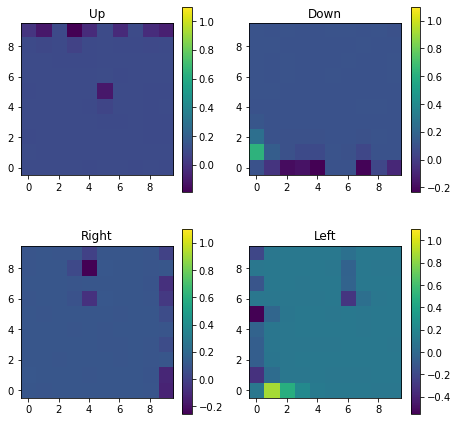

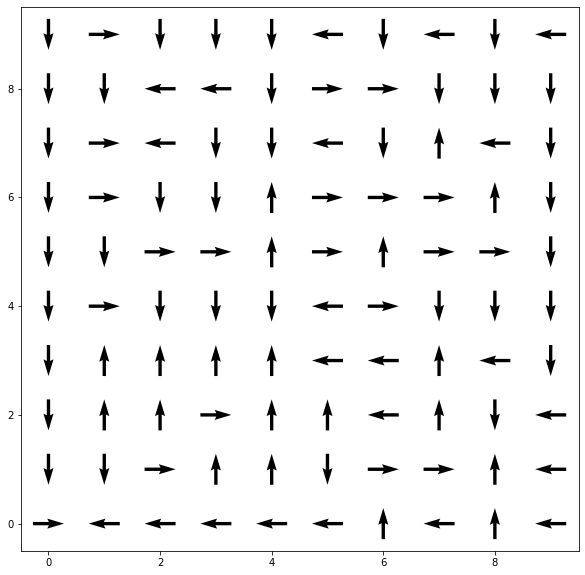

In [9]:
g10.plot_Q()

g10.navigation_map()

arrows tend away from walls(obstacles) may be due to negative rewards-

close to target it has high Q values i.e higher rewards
and away from target it has less Q values